Business Understanding

Financial markets are fundamental institutions in any developing economy. They play a crucial role in promoting economic growth by facilitating the channeling of saving decisions into productive investment. A major concern for financial institutions is credit risk, because if not managed properly, it can lead to a banking collapse. 

In our banking system, banks have many products to sell but the main source of income of any bank is on its credit line. Loan is the core business part of banks. A bank's profit or a loss depends to a large extent on loans i.e. whether the customers are paying back the loan or defaulting. 

Though a lot of people are applying for loans. However, they may have some difficulty in repaying the loan, due to their own capability to repay loan, their personal monetary terms, etc.. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, a lot of misconception may happen to select the genuine applicant. The banks hold the risk of losing the amount loaned to the borrowers, which is basically regarded as "Credit risk". 

Credit risk is the potential that a bank’s borrower or counterparty fails to meet its obligations in repaying the loan borrowed from the financial institutions ("banks").

By predicting the loan defaulters, the bank can reduce its Non-Performing Assets. This makes the study of this phenomenon very important. 

Thus, the banks need to manage the credit risks in their portfolio both at the individual borrower and transactional level, as well as to consider the linkage between credit risks and other types of risk. This is because these are criteria to assess the success/failure of any banking lending activities.

Many research confirmed that machine learning technology is highly efficient to predict this situation. This technique is applied through learning from previous data.

Credit Risk Scoring Dataset

Domain - Banking
Dataset - Click here to download the dataset: credit_risk_dataset.csv
Detailed data description of Credit Risk dataset:
- Feature Name :                  Description
- person_age :                       Age
- person_income  :                   Annual Income
- person_home_ownership :            Home ownership
- person_emp_length   :              Employment length (in years)
- loan_intent      :                 Loan intent
- loan_grade     :                   Loan grade
- loan_amnt     :                    Loan amount
- loan_int_rate  :                   Interest rate
- loan_status     :                  Loan status (0 is non default 1 is default)
- loan_percent_income :              Percent income
- cb_person_default_on_file :        Historical default
- cb_preson_cred_hist_length :       Credit history length


SPRINT 1 - Data Preparation and Model Building

Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

Task - Prepare the data and build a model to predict if a customer is going to default or not.

Step - 1: Load the data
Step - 2: Document the below mentioned points properly: 
- Identify the input and output/target variables. 
- Identify the type of ML Task.
- Identify the Evaluation Metric.
	- For regression task - Mean Absolute Error
	- For classification task - Accuracy
Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).
Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 5: Data preparation on test data:
- For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)
Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- KNN
- Logistic Regression
- Support Vector Machines
- Decision Trees
- Random Forest


Step - 7: Predict and evaluate each model separately using the correct evaluation metric. Use metrics.accuracy(actual, predict).
Step - 8: Display a plot which shows all the algorithms applied along with the accuracies achieved. Write your conclusion on the best algorithm for Credit Risk Scoring.



## Data Loading


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('data/credit_risk_dataset.csv')

data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


## Checking for Duplicates and null values and dropping them

In [3]:
data.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [4]:
data.isnull().sum()


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
data.duplicated().sum()


165

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.shape

(32416, 12)

In [8]:
data.dropna(inplace=True)

In [9]:
data.shape

(28501, 12)

# Splitting inputs and target features

### Problem Statement - Given various features about a customer like Age, Income, Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is given, will the customer default or not on the Loan payments.

#### taget : to identify the customer default or not  --> loan_status 
#### as target is available in training data , this will be the supervised learning and the task is classification

In [10]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## Target and input features splitting

In [11]:
y = data['loan_status']

x = data.drop('loan_status',axis=1)

print(x.columns, y)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length'],
      dtype='object') 0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 28501, dtype: int64


In [12]:
import sklearn

In [13]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=100)

In [14]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

X_test.head()

(21375, 11) (21375,)
(7126, 11) (7126,)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29895,37,40800,OWN,0.0,VENTURE,C,4000,13.49,0.10,Y,14
16179,24,72000,RENT,5.0,HOMEIMPROVEMENT,B,8000,10.00,0.11,N,2
8060,24,55000,MORTGAGE,4.0,DEBTCONSOLIDATION,C,1600,13.79,0.03,N,2
24698,30,66000,RENT,5.0,EDUCATION,D,10000,14.83,0.15,Y,9
29322,41,75000,RENT,1.0,PERSONAL,B,20000,11.14,0.27,N,11


###  Separating Categorical and Numerical Columns: 

In [15]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_num = X_train.select_dtypes(include=['int64','float64'])

In [16]:
X_train_cat.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [17]:
X_train_num.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

## Scaling the Numerical Features

In [18]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6298,26,33600,4.0,6000,10.71,0.18,3
32463,53,43200,0.0,10000,9.88,0.23,30
31862,44,175000,9.0,15000,7.66,0.09,17
11016,25,63000,6.0,4200,14.22,0.07,4
15565,25,133000,8.0,3000,17.90,0.02,2


In [19]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_num_rescaled = pd.DataFrame(std_scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
6298,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560
32463,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683
31862,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566
11016,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551
15565,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569


### Categorical Columns -- identification of nomial and ordinal features

In [20]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6298,RENT,DEBTCONSOLIDATION,B,N
32463,RENT,VENTURE,B,N
31862,MORTGAGE,HOMEIMPROVEMENT,A,N
11016,RENT,VENTURE,C,N
15565,MORTGAGE,DEBTCONSOLIDATION,F,Y


In [21]:
X_train_cat.person_home_ownership.value_counts()

RENT        10908
MORTGAGE     8766
OWN          1629
OTHER          72
Name: person_home_ownership, dtype: int64

In [22]:
X_train_cat.loan_intent.value_counts()

EDUCATION            4257
MEDICAL              3968
PERSONAL             3664
VENTURE              3642
DEBTCONSOLIDATION    3465
HOMEIMPROVEMENT      2379
Name: loan_intent, dtype: int64

In [23]:
X_train_cat.loan_grade.value_counts()

A    7043
B    6748
C    4246
D    2458
E     673
F     162
G      45
Name: loan_grade, dtype: int64

In [24]:
X_train_cat.cb_person_default_on_file.value_counts()

N    17586
Y     3789
Name: cb_person_default_on_file, dtype: int64

## Oridnal features : loan_grade,cb_person_default_on_file --> LabelEncoding

In [25]:
#

loan_grade_encoder = {"A":7,"B":6,"C":5,"D":4,"E":3,"F":2,"G":1}

X_train_cat['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_train_cat['cb_person_default_on_file'] = X_train_cat['cb_person_default_on_file'].apply(lambda x : 0 if x=='N' else 1)

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
6298,RENT,DEBTCONSOLIDATION,6,0
32463,RENT,VENTURE,6,0
31862,MORTGAGE,HOMEIMPROVEMENT,7,0
11016,RENT,VENTURE,5,0
15565,MORTGAGE,DEBTCONSOLIDATION,2,1



## Nomial features : person_home_ownership,loan_intent --> OneHotEncoding

In [26]:
X_train_cat_ohe = X_train_cat[["person_home_ownership","loan_intent"]]

X_train_cat.drop(["person_home_ownership","loan_intent"],axis=1,inplace=True)


In [27]:
X_train_cat_ohe.head()

,person_home_ownership,loan_intent
6298,RENT,DEBTCONSOLIDATION
32463,RENT,VENTURE
31862,MORTGAGE,HOMEIMPROVEMENT
11016,RENT,VENTURE
15565,MORTGAGE,DEBTCONSOLIDATION


In [28]:
X_train_cat.head()

,loan_grade,cb_person_default_on_file
6298,6,0
32463,6,0
31862,7,0
11016,5,0
15565,2,1


In [29]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=2000, sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat_ohe), 
                               columns=encoder_.get_feature_names_out(X_train_cat_ohe.columns), 
                               index = X_train_cat_ohe.index)

X_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
6298,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32463,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31862,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11016,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15565,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## concating all numerical and categorial transformed features

In [30]:
X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat,X_train_cat_ohe],axis=1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
6298,-0.278382,-0.499954,-0.188847,-0.576751,-0.107178,0.095536,-0.694560,6,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32463,4.027395,-0.355098,-1.163696,0.052923,-0.363239,0.563539,5.974683,6,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
31862,2.592136,1.633656,1.029714,0.840016,-1.048124,-0.746869,2.763566,7,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11016,-0.437856,-0.056332,0.298577,-0.860104,0.975682,-0.934071,-0.447551,5,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
15565,-0.437856,0.999910,0.786002,-1.049007,2.110988,-1.402074,-0.941569,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Preparing Test Data

In [31]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
29895,37,40800,OWN,0.0,VENTURE,C,4000,13.49,0.10,Y,14
16179,24,72000,RENT,5.0,HOMEIMPROVEMENT,B,8000,10.00,0.11,N,2
8060,24,55000,MORTGAGE,4.0,DEBTCONSOLIDATION,C,1600,13.79,0.03,N,2
24698,30,66000,RENT,5.0,EDUCATION,D,10000,14.83,0.15,Y,9
29322,41,75000,RENT,1.0,PERSONAL,B,20000,11.14,0.27,N,11


In [32]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_num = X_test.select_dtypes(include=['int64','float64'])

In [33]:
X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29895,OWN,VENTURE,C,Y
16179,RENT,HOMEIMPROVEMENT,B,N
8060,MORTGAGE,DEBTCONSOLIDATION,C,N
24698,RENT,EDUCATION,D,Y
29322,RENT,PERSONAL,B,N


In [34]:
X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29895,37,40800,0.0,4000,13.49,0.10,14
16179,24,72000,5.0,8000,10.00,0.11,2
8060,24,55000,4.0,1600,13.79,0.03,2
24698,30,66000,5.0,10000,14.83,0.15,9
29322,41,75000,1.0,20000,11.14,0.27,11


## Scaling the Numerical Features in test data

In [35]:
X_test_num_rescaled = pd.DataFrame(std_scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
29895,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539
16179,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569
8060,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569
24698,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494
29322,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512


### Categorical Columns  -- test data preprocessing

In [36]:
## LabelEncoding

X_test_cat['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_test_cat['cb_person_default_on_file'] = X_test_cat['cb_person_default_on_file'].apply(lambda x : 0 if x=='N' else 1)

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
29895,OWN,VENTURE,5,1
16179,RENT,HOMEIMPROVEMENT,6,0
8060,MORTGAGE,DEBTCONSOLIDATION,5,0
24698,RENT,EDUCATION,4,1
29322,RENT,PERSONAL,6,0


## OneHot Encoding 

In [37]:
X_test_cat_ohe = X_test_cat[["person_home_ownership","loan_intent"]]

X_test_cat.drop(["person_home_ownership","loan_intent"],axis=1,inplace=True)

In [38]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat_ohe), 
                               columns=encoder_.get_feature_names_out(X_test_cat_ohe.columns), 
                               index = X_test_cat_ohe.index)

X_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
29895,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16179,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8060,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24698,1.0,0.0,1.0,0.0,0.0,0.0,0.0
29322,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## concating all numerical and categorial transformed test data features

In [39]:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat,X_test_cat_ohe],axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,cb_person_default_on_file,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
29895,1.475823,-0.391312,-1.163696,-0.891588,0.750472,-0.653269,2.022539,5,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0
16179,-0.597329,0.079471,0.054865,-0.261914,-0.326218,-0.559668,-0.941569,6,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8060,-0.597329,-0.177045,-0.188847,-1.269392,0.843024,-1.308473,-0.941569,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24698,0.359510,-0.011064,0.054865,0.052923,1.163871,-0.185266,0.787494,4,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
29322,2.113716,0.124738,-0.919984,1.627109,0.025480,0.937942,1.281512,6,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## KNN Classifier

Accuracy:  0.8996632051641875


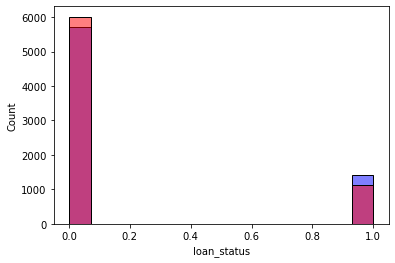

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

y_test_pred = knn.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

## Logistic Regression

Accuracy:  0.8605108055009824


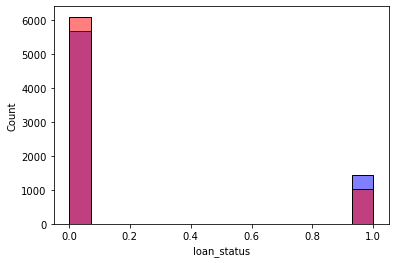

In [41]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_transformed, y_train)

y_test_pred = logistic_reg.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)


print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

## Support Vector Machines

Accuracy:  0.9007858546168959


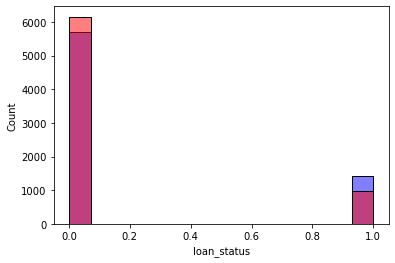

In [42]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

y_test_pred = svc.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)


print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

## Decision Trees

Accuracy:  0.8860510805500982


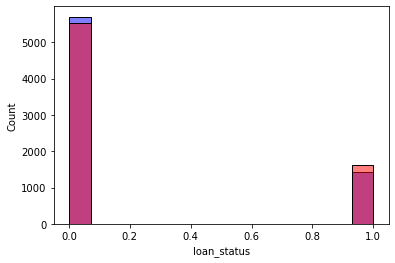

In [43]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train_transformed, y_train)

y_test_pred = tree.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)


print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

## Random Forest

Accuracy:  0.9397979230985125


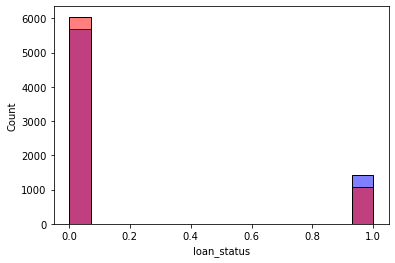

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_transformed, y_train)

y_test_pred = rfc.predict(X_test_transformed)

sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)


print('Accuracy: ', metrics.accuracy_score(y_test, y_test_pred))

## conclusions:

### Accuray:

- KNeighborsClassifier -- 0.8996632051641875
- LogisticRegression -- 0.8605108055009824
- SVC -- 0.9007858546168959
- DecisionTreeClassifier -- 0.8860510805500982
- RandomForestClassifier -- 0.9397979230985125

- RandomForestClassifier > SVC > KNeighborsClassifier > DecisionTreeClassifier > LogisticRegression